In [1]:
# see: https://www.kaggle.com/kanncaa1/statistical-learning-tutorial-for-beginners

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas.tools import plotting
from scipy import stats
plt.style.use("ggplot")
from scipy import stats
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
df = pd.read_csv('dpe-france.csv')
df.head(3)

,nom_methode_dpe,version_methode_dpe,date_etablissement_dpe,consommation_energie,classe_consommation_energie,estimation_ges,classe_estimation_ges,annee_construction,surface_thermique_lot,latitude,longitude,result_label,result_score,tr001_modele_dpe_type_libelle,tr002_type_batiment_description
0,3CL,"3CL-DPE, version 1.3",2013-04-12,132.0,C,29.0,D,5200,190.0,46.134409,5.553940,3 Impasse du Tilleul 01430 Saint-Martin-du-Frêne,0.94,Vente,Maison Individuelle
1,Méthode Facture,NaN,2013-04-20,0.0,N,0.0,N,1947,42.0,43.320718,6.287329,7 Rue de la Treille 83590 Gonfaron,0.95,Vente,Maison Individuelle
2,Méthode 3CL,"3CL-DPE, version 1.3",2013-04-16,326.0,E,18.0,C,2006,107.0,46.661391,2.686369,7 Route du Bois Jaubin 03360 Saint-Bonnet-Tron...,0.68,Vente,Maison Individuelle


# Only select housing energy consumption data

In [4]:
df_mi = df[df['tr002_type_batiment_description'] == 'Maison Individuelle']
df_mi.head()

,nom_methode_dpe,version_methode_dpe,date_etablissement_dpe,consommation_energie,classe_consommation_energie,estimation_ges,classe_estimation_ges,annee_construction,surface_thermique_lot,latitude,longitude,result_label,result_score,tr001_modele_dpe_type_libelle,tr002_type_batiment_description
0,3CL,"3CL-DPE, version 1.3",2013-04-12,132.0,C,29.0,D,5200,190.00,46.134409,5.553940,3 Impasse du Tilleul 01430 Saint-Martin-du-Frêne,0.94,Vente,Maison Individuelle
1,Méthode Facture,NaN,2013-04-20,0.0,N,0.0,N,1947,42.00,43.320718,6.287329,7 Rue de la Treille 83590 Gonfaron,0.95,Vente,Maison Individuelle
2,Méthode 3CL,"3CL-DPE, version 1.3",2013-04-16,326.0,E,18.0,C,2006,107.00,46.661391,2.686369,7 Route du Bois Jaubin 03360 Saint-Bonnet-Tron...,0.68,Vente,Maison Individuelle
6,Méthode 3CL,"3CL-DPE, version 1.3",2013-04-10,174.0,D,52.0,E,2001,87.56,45.095755,4.786621,Chemin du Moulin 07610 Lemps,0.50,Vente,Maison Individuelle
8,Méthode Facture,NaN,2013-05-06,8.0,A,0.0,A,1947,102.00,42.945868,1.563608,Chemin de Micou 09000 Ganac,0.70,Vente,Maison Individuelle


In [5]:
df_mi.columns

Index(['nom_methode_dpe', 'version_methode_dpe', 'date_etablissement_dpe',
       'consommation_energie', 'classe_consommation_energie', 'estimation_ges',
       'classe_estimation_ges', 'annee_construction', 'surface_thermique_lot',
       'latitude', 'longitude', 'result_label', 'result_score',
       'tr001_modele_dpe_type_libelle', 'tr002_type_batiment_description'],
      dtype='object')

In [6]:
maison = df_mi.drop(['nom_methode_dpe', 'version_methode_dpe', 'date_etablissement_dpe',\
                     'tr001_modele_dpe_type_libelle', 'result_label', 'tr002_type_batiment_description'], axis = 1)

In [7]:
maison.head(2)

,consommation_energie,classe_consommation_energie,estimation_ges,classe_estimation_ges,annee_construction,surface_thermique_lot,latitude,longitude,result_score
0,132.0,C,29.0,D,5200,190.0,46.134409,5.553940,0.94
1,0.0,N,0.0,N,1947,42.0,43.320718,6.287329,0.95


In [8]:
maison = maison.rename(columns={'consommation_energie':'consEn', 'classe_consommation_energie':'clEn',\
                                'estimation_ges':'ges', 'classe_estimation_ges':'clGes', 'annee_construction':'annee',\
                                'surface_thermique_lot':'surface', 'latitude':'lat', 'longitude':'long', \
                               'result_score':'score'})

In [9]:
maison.columns

Index(['consEn', 'clEn', 'ges', 'clGes', 'annee', 'surface', 'lat', 'long',
       'score'],
      dtype='object')

# Check for outliers

In [10]:
maison.describe()

,consEn,ges,annee,surface,lat,long,score
count,6525.000000,6525.000000,6525.000000,6524.000000,6463.000000,6463.000000,6463.000000
mean,227.941891,30.550322,1935.234330,149.195253,46.699226,2.408760,0.763156
std,142.586829,31.792683,255.933625,372.226031,2.420814,2.833037,0.164214
min,-25.460000,-24.000000,-1.000000,0.000000,-21.166860,-4.752926,0.180000
25%,142.000000,8.000000,1947.000000,80.170000,44.934498,0.370013,0.670000
50%,220.000000,17.330000,1962.000000,101.000000,47.054320,2.330387,0.790000
75%,307.780000,46.000000,1989.000000,133.717500,48.441204,4.454700,0.930000
max,1155.000000,239.060000,6060.000000,10084.000000,51.049457,55.495400,0.970000


Delete consEn, ges values smaller than 0

In [11]:
maison = maison.drop(maison[maison['consEn'] < 0].index)
maison = maison.drop(maison[maison['ges'] < 0].index)

In [12]:
maison.describe()

,consEn,ges,annee,surface,lat,long,score
count,6521.000000,6521.000000,6521.000000,6520.000000,6459.000000,6459.000000,6459.000000
mean,228.026269,30.575228,1935.210244,149.222900,46.700926,2.408923,0.763188
std,142.564345,31.785122,256.009851,372.338191,2.420561,2.833251,0.164216
min,0.000000,0.000000,-1.000000,0.000000,-21.166860,-4.752926,0.180000
25%,142.000000,8.000000,1947.000000,80.167500,44.936672,0.370013,0.670000
50%,220.000000,17.330000,1962.000000,101.000000,47.058665,2.330461,0.790000
75%,307.840000,46.000000,1989.000000,133.717500,48.441843,4.454700,0.930000
max,1155.000000,239.060000,6060.000000,10084.000000,51.049457,55.495400,0.970000


Delete "annee" with  years < 1945 and years > 2020 \
Houses before 1945 assumed not representative for "modern" house building

In [13]:
maison = maison.drop(maison[maison['annee'] < 1945].index)
maison = maison.drop(maison[maison['annee'] > 2020].index)

In [14]:
maison.describe()

,consEn,ges,annee,surface,lat,long,score
count,5902.000000,5902.000000,5902.000000,5901.000000,5860.000000,5860.000000,5860.000000
mean,233.266195,31.473492,1970.835141,152.703684,46.653524,2.412762,0.768507
std,140.920760,31.910387,22.917248,390.570847,2.274012,2.796803,0.164639
min,0.000000,0.000000,1945.000000,0.000000,-20.921429,-4.752926,0.200000
25%,147.000000,8.855000,1948.000000,80.970000,44.895852,0.311666,0.670000
50%,223.000000,18.070000,1974.000000,101.000000,47.009106,2.328282,0.790000
75%,312.000000,47.000000,1989.000000,133.930000,48.392957,4.563987,0.940000
max,1155.000000,230.000000,2013.000000,10084.000000,51.049457,55.495400,0.970000


In [15]:
maison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5902 entries, 1 to 9999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   consEn   5902 non-null   float64
 1   clEn     5902 non-null   object 
 2   ges      5902 non-null   float64
 3   clGes    5902 non-null   object 
 4   annee    5902 non-null   int64  
 5   surface  5901 non-null   float64
 6   lat      5860 non-null   float64
 7   long     5860 non-null   float64
 8   score    5860 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 461.1+ KB


# Get dummy variables for classes

In [16]:
maison_dum = pd.get_dummies(maison)
maison_dum.head()

,consEn,ges,annee,surface,lat,long,score,clEn_A,clEn_B,clEn_C,...,clEn_G,clEn_N,clGes_A,clGes_B,clGes_C,clGes_D,clGes_E,clGes_F,clGes_G,clGes_N
1,0.00,0.00,1947,42.00,43.320718,6.287329,0.95,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,326.00,18.00,2006,107.00,46.661391,2.686369,0.68,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,174.00,52.00,2001,87.56,45.095755,4.786621,0.50,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,8.00,0.00,1947,102.00,42.945868,1.563608,0.70,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,249.12,13.26,2006,91.00,48.140830,4.211108,0.81,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# EDA

Check surface data more closely

In [17]:
#Delete surfaces bigger than 300 m2 for now
maison = maison.drop(maison[maison['surface']> 300].index)
maison.describe()

,consEn,ges,annee,surface,lat,long,score
count,5775.000000,5775.000000,5775.000000,5774.000000,5733.000000,5733.000000,5733.000000
mean,236.387287,31.752313,1970.428918,109.473978,46.636628,2.425669,0.772163
std,140.588102,32.128878,22.693713,44.248221,2.286171,2.807561,0.161893
min,0.000000,0.000000,1945.000000,0.000000,-20.921429,-4.752926,0.200000
25%,152.000000,8.660000,1948.000000,80.170000,44.868348,0.354952,0.680000
50%,225.800000,19.000000,1974.000000,100.000000,46.973282,2.339666,0.800000
75%,315.000000,47.515000,1989.000000,130.000000,48.411959,4.597777,0.940000
max,1155.000000,230.000000,2013.000000,300.000000,51.049457,55.495400,0.970000


[(0.0, 500.0)]

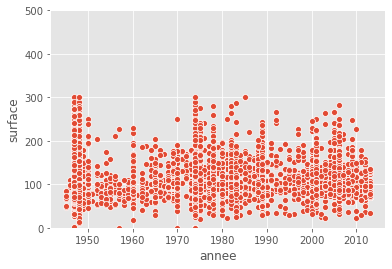

In [18]:
import matplotlib.pyplot as plt
plt.figure
plot = sns.scatterplot(x='annee', y='surface', data=maison)
plot.set(ylim=(0, 500))

Check consommation energie (consEn) more closely

In [19]:
#count null values
mis_val_count = maison.isnull().sum()
print(mis_val_count[mis_val_count > 0])

surface     1
lat        42
long       42
score      42
dtype: int64


In [20]:
null_values = maison[maison['consEn'] == 0]
null_values.shape # 540 rows with 0 values for consEn and ges --> not credible, return year for these zero's

(534, 9)

In [21]:
maison.loc[maison['consEn'] == 0, 'annee']

1       1947
24      1948
26      1947
63      1948
85      1980
        ... 
9946    1948
9947    1947
9951    1947
9968    1947
9991    1947
Name: annee, Length: 534, dtype: int64

In [22]:
#delete all rows with zero values for consEn, ges and surface
maison = maison.drop(maison[maison['consEn'] == 0].index)
maison = maison.drop(maison[maison['ges'] == 0].index)
maison = maison.drop(maison[maison['surface'] == 0].index)
desc = maison.describe()
desc

,consEn,ges,annee,surface,lat,long,score
count,5226.000000,5226.000000,5226.000000,5225.000000,5186.000000,5186.000000,5186.000000
mean,260.670413,35.016190,1972.561232,110.552329,46.651477,2.392708,0.771560
std,124.385477,31.999245,22.642057,43.445086,2.320277,2.847918,0.161028
min,9.190000,0.300000,1945.000000,10.960000,-20.921429,-4.752926,0.200000
25%,175.000000,10.785000,1948.000000,82.000000,44.864674,0.310281,0.680000
50%,239.590000,24.000000,1974.000000,101.000000,47.020916,2.314242,0.800000
75%,323.557500,51.000000,1989.000000,131.500000,48.456393,4.616982,0.940000
max,1155.000000,230.000000,2013.000000,300.000000,51.049457,55.495400,0.970000


In [23]:
desc['consEn'][1]

260.6704133180253

proportion houses build per year

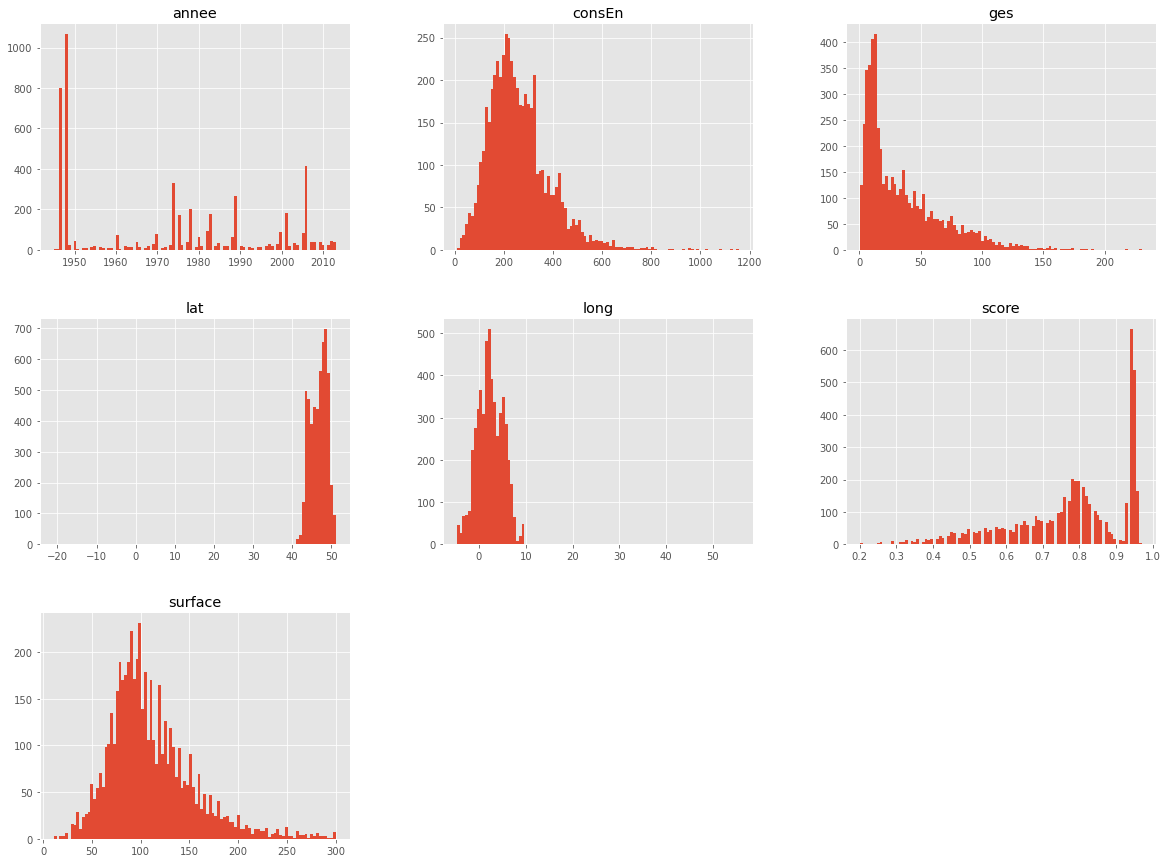

In [24]:
#histogram of numerical data
#maison_num = maison.select_dtypes(exclude=['object'])

%matplotlib inline
import matplotlib.pyplot as plt
maison.hist(bins=100, figsize = (20, 15))
plt.show()

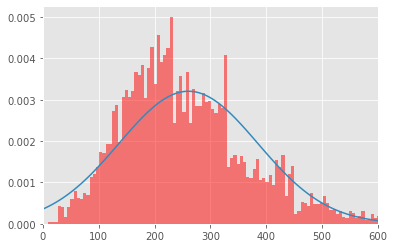

In [27]:
#compare consEn empericial distribution with theoretical pdf (mu, std)
from scipy.stats import norm

plt.figure
_=plt.hist(maison['consEn'], bins=200, density = True, fc =(1,0,0,0.5))
_=plt.xlim(0, 600)
x = np.linspace(0, 600, 100)
mu = desc['consEn'][1]
std = desc['consEn'][2]
_=plt.plot(x, norm.pdf(x, mu, std)) # distribution is skewed to the left. 

In [28]:
#delete consEn values bigger than mu + 3*std
maison = maison.drop(maison[maison['consEn'] > mu + 3*std].index)
# delete house at long > 20
maison = maison.drop(maison[maison['long'] > 20].index)
maison.shape

(5161, 9)

C:\Users\pasca\anaconda3\envs\Work_base\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


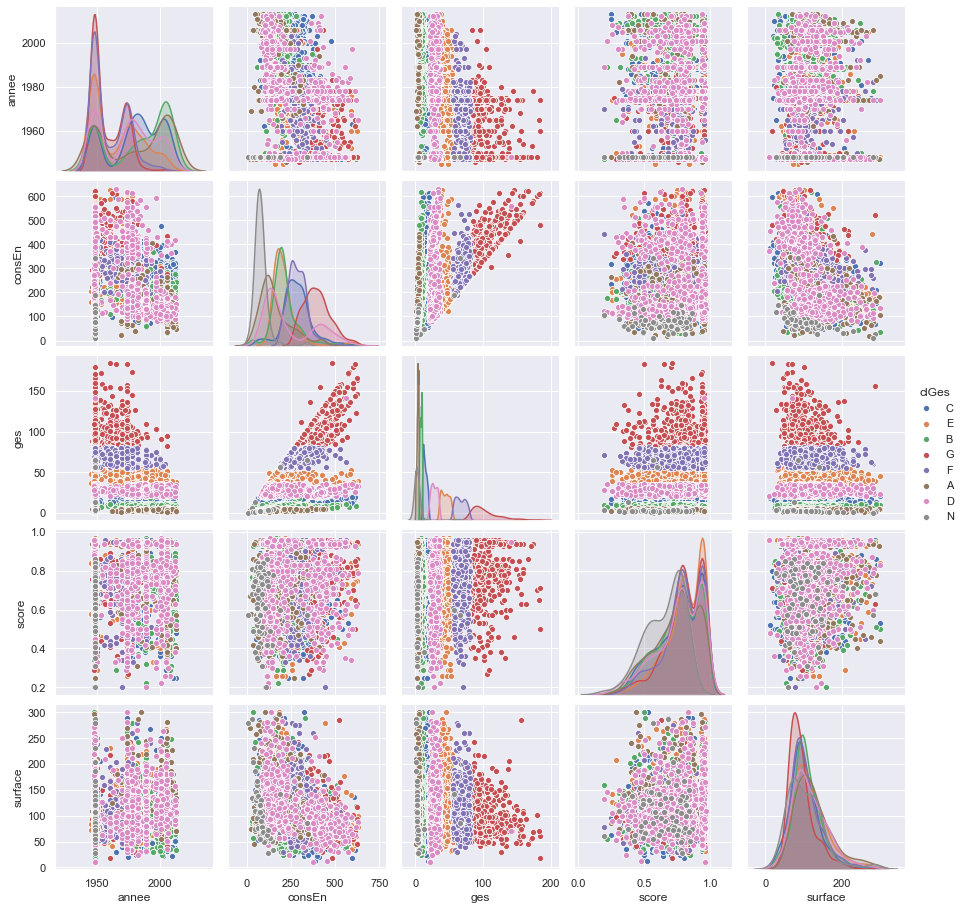

In [36]:
#make pairplot to visualize correlation between variables
sns.set()
cols = ['annee', 'consEn', 'ges', 'clGes', 'score', 'surface']
sns.pairplot(maison[cols], height = 2.5, hue = 'clGes')
plt.show() # check how to add color with hue, gives error warning !!! Why???

In [46]:
maison_by_year_count = maison.groupby('annee').size()
maison_by_year = maison.groupby('annee').sum()
maison_by_year['count']= maison_by_year_count
maison_by_year.head()

,consEn,ges,surface,lat,long,score,count
annee,,,,,,,
1945,363.08,84.96,158.00,93.708725,7.947302,1.42,2
1946,517.09,93.52,201.91,95.471173,7.838792,1.70,2
1947,194732.55,24856.37,93743.86,36827.342627,1881.570663,644.88,785
1948,303490.63,51220.41,112044.60,49132.796006,2299.433658,846.84,1049
1949,7774.27,1041.92,2440.01,1126.604414,52.877245,17.27,24


In [47]:
maison_by_year['prop(%)'] = 100*maison_by_year['count'] / maison_by_year['count'].sum()
maison_by_year.head()

,consEn,ges,surface,lat,long,score,count,prop(%)
annee,,,,,,,,
1945,363.08,84.96,158.00,93.708725,7.947302,1.42,2,0.038752
1946,517.09,93.52,201.91,95.471173,7.838792,1.70,2,0.038752
1947,194732.55,24856.37,93743.86,36827.342627,1881.570663,644.88,785,15.210231
1948,303490.63,51220.41,112044.60,49132.796006,2299.433658,846.84,1049,20.325518
1949,7774.27,1041.92,2440.01,1126.604414,52.877245,17.27,24,0.465026


In [48]:
#check sum of column prop = 1
maison_by_year['prop(%)'].sum()

100.00000000000001

Text(0.5, 1.0, 'houses build per year between 1945 - 2013 in %')

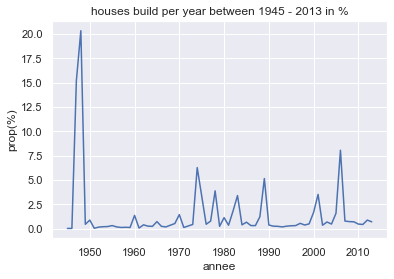

In [49]:
prop = sns.lineplot(x='annee', y='prop(%)', data=maison_by_year.reset_index())
plt.title('houses build per year between 1945 - 2013 in %')

# Discover "maison" data on map

Text(0.5, 1.0, 'bad visualization plot')

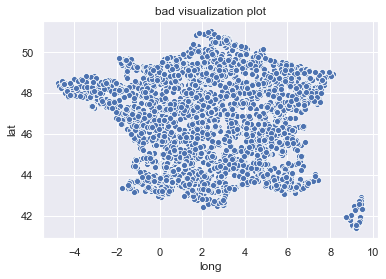

In [50]:
# longitude, latitude plot of maison data
vis = sns.scatterplot(x='long', y='lat', data=maison)
plt.title('bad visualization plot')

Text(0.5, 1.0, 'better visualization plot')

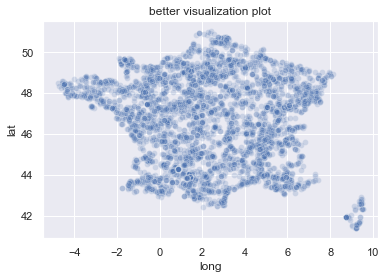

In [53]:
#better visualization plot by indicating density
vis = sns.scatterplot(x='long', y='lat', data=maison, alpha=0.2)
plt.title('better visualization plot')

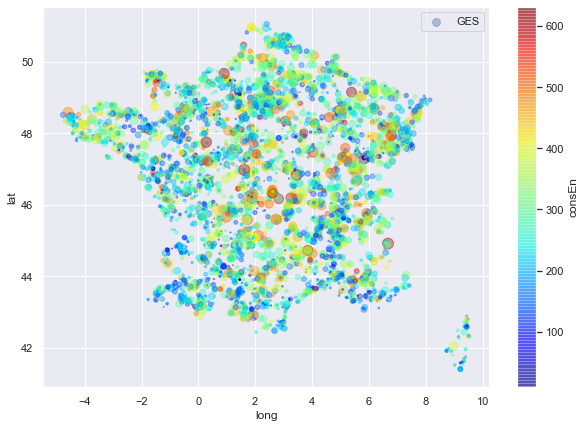

In [54]:
_= maison.plot(kind="scatter", x='long', y='lat', alpha=0.4, c='consEn', figsize=(10,7),\
                  s=maison['ges']/1.5, label='GES', cmap=plt.get_cmap("jet"), colorbar=True,sharex=False)
_ = plt.legend()